## Imports

In [72]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

## Settings

In [73]:
imdir = '/home/drevital/obstacles_classification_datasets/7_channels/compare'
imname = 'compare_no_obstacle.jpg'
threshold = 50

# Read image & separate it to <ref, current>

In [74]:
imrgb = cv2.imread(os.path.join(imdir, imname))
im = cv2.cvtColor(imrgb, cv2.COLOR_BGR2RGB)        
w = im.shape[1]
ref = im[:, :w//2]
current = im[:, w//2:]

## Recreate Diff Original Parts

In [75]:
gray_ref = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)  
gray_current = cv2.cvtColor(current, cv2.COLOR_BGR2GRAY)  

## Recreate Diff Original Image

In [76]:
orig_diff = cv2.hconcat([gray_ref, gray_current])

## Display Diff Original Image

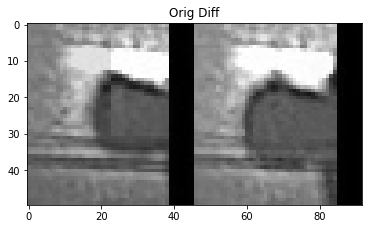

In [77]:
plt.imshow(orig_diff, cmap='gray', vmin=0, vmax=255)
plt.title('Orig Diff')
plt.show()

## Generate Diff Image

In [78]:
diff = cv2.absdiff(gray_ref, gray_current)

## Display Diff Image

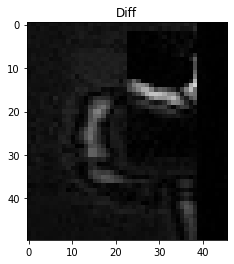

In [79]:
plt.imshow(diff, cmap='gray', vmin=0, vmax=255)
plt.title('Diff')
plt.show()

## Recreate Green Original Image

In [80]:
green_ref = ref[:, :, 1]
green_current = current[:, :, 1]
const = np.full((green_ref.shape[0]*green_ref.shape[1]), 127, dtype=np.uint8)
const = const.reshape((green_ref.shape[0], green_ref.shape[1], 1))
orig_green = cv2.hconcat([green_ref, green_current])

## Display Green Original Image

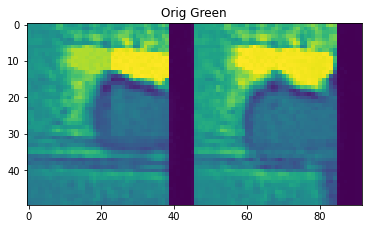

In [81]:
plt.imshow(orig_green)
plt.title('Orig Green')
plt.show()

## Generate Green Image

In [82]:
green = cv2.merge([green_ref, green_current, const])

## Display Green Image

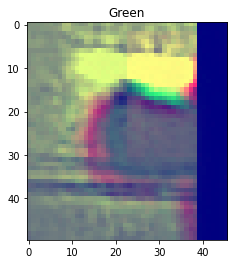

In [83]:
plt.imshow(green)
plt.title('Green')
plt.show()

## Generate RGB Image

In [84]:
orig_rgb = cv2.hconcat([ref, current])

## Display RGB Image

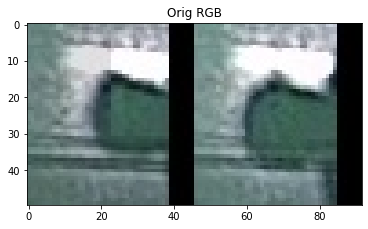

In [85]:
plt.imshow(orig_rgb)
plt.title('Orig RGB')
plt.show()

## Generate 7 Channels Image

In [86]:
diff = cv2.absdiff(current, ref)
agg_rgb = np.stack((diff[:, :, 0], diff[:, :, 1], diff[:, :, 2])).max(0)
_, mask = cv2.threshold(agg_rgb, threshold, 255, cv2.THRESH_BINARY)
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)  
chan_7 = cv2.hconcat([ref, current, mask])

## Display 7 Channels Image

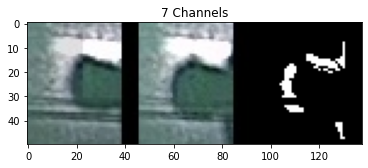

In [87]:
plt.imshow(chan_7)
plt.title('7 Channels')
plt.show()